<a href="https://colab.research.google.com/github/mallelamanojkumar90/AIML/blob/main/AIML_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

**Category:** Supervised Learning (Classification)

**Description:**
Despite its name, it's used for classification by estimating probabilities using a logistic function.

**Key Components:**
- Loss Function: Binary Cross-Entropy
- Activation: Sigmoid Function
- Decision Boundary: Linear

**Example Application:**

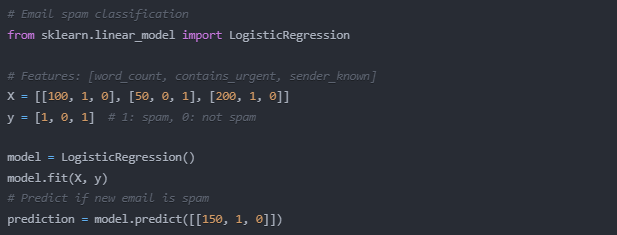


**Best Used For:**
- Credit risk assessment
- Disease diagnosis
- Email spam detection
- Customer churn prediction


**Steps to implement:**

  **Data Loading and Exploration:**

  Loads the Boston Housing dataset
  Shows basic dataset information
  Creates visualizations of data distribution
  Generates correlation matrix


  **Data Preprocessing:**

  Feature scaling using StandardScaler
  Train-test split
  Data preparation for modeling


  **Model Training:**

  Linear Regression implementation
  Feature importance visualization
  Coefficient analysis


  **Model Evaluation:**

  Multiple evaluation metrics (R², RMSE, MSE)
  Actual vs Predicted plots
  Residual analysis
  Diagnostic plots


  **Prediction Functionality:**

  Ability to make new predictions
  Example prediction with sample data

**The code includes detailed visualizations:**

Price distribution
Correlation heatmap
Feature importance plots
Residual analysis plots
Actual vs Predicted comparison

In [1]:
# Install required libraries
!pip install seaborn numpy pandas matplotlib scikit-learn plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Set style for better visualizations
#plt.style.use('seaborn')

sns.set_palette("husl")

In [4]:
class BostonHousingAnalysis:
    def __init__(self):
        """Initialize the analysis class"""
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.predictions = None
        self.df = None
        self.feature_names = None

    def load_data(self):
        """Load and prepare the California Housing dataset"""
        # Load dataset
        california = fetch_california_housing()

        # Create DataFrame
        self.df = pd.DataFrame(california.data, columns=california.feature_names)
        self.df['PRICE'] = california.target
        self.feature_names = california.feature_names


        print("Dataset Shape:", self.df.shape)
        print("\nFeatures Description:")
        # Print the description, handling potential encoding issues and limiting length
        try:
            description = california.DESCR
            print(description[:500] + "...")
        except UnicodeEncodeError:
            print("Description not available due to encoding issues.")


        return self.df

    def explore_data(self):
        """Perform exploratory data analysis with visualizations"""

        if self.df is None:
            print("Data not loaded. Please run load_data() first.")
            return

        # 1. Distribution of target variable (PRICE)
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df['PRICE'], kde=True)
        plt.title('Distribution of House Prices')
        plt.xlabel('Price')
        plt.ylabel('Count')
        plt.show()

        # 2. Correlation Matrix Heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix of Features')
        plt.tight_layout()
        plt.show()

        # 3. Scatter plots of top 3 correlated features with price
        correlations = self.df.corr()['PRICE'].sort_values(ascending=False)
        # Exclude PRICE itself from top features
        top_features = correlations[1:4].index.tolist()

        # Ensure there are features to plot
        if not top_features:
            print("Not enough features to plot top correlations.")
            return

        fig, axes = plt.subplots(1, len(top_features), figsize=(5 * len(top_features), 5))
        # Handle case with only one subplot
        if len(top_features) == 1:
            axes = [axes]

        for i, feature in enumerate(top_features):
            sns.scatterplot(data=self.df, x=feature, y='PRICE', ax=axes[i])
            axes[i].set_title(f'Price vs {feature}')
        plt.tight_layout()
        plt.show()

        # 4. Box plots for understanding price distribution across different features
        # Select a few categorical or near-categorical features for box plots if available
        # For California Housing, we can pick a few features to show distribution
        features_for_boxplots = ['HouseAge', 'AveRooms', 'AveBedrms'] # Example features

        if not features_for_boxplots or any(f not in self.df.columns for f in features_for_boxplots):
             print("Selected features for box plots not found in data.")
             return

        fig, axes = plt.subplots(1, len(features_for_boxplots), figsize=(5 * len(features_for_boxplots), 5))
        if len(features_for_boxplots) == 1:
             axes = [axes]

        for i, feature in enumerate(features_for_boxplots):
            sns.boxplot(x=feature, y='PRICE', data=self.df, ax=axes[i])
            axes[i].set_title(f'Price distribution by {feature}')
        plt.tight_layout()
        plt.show()


    def prepare_data(self):
        """Prepare data for modeling"""
        if self.df is None:
            print("Data not loaded. Please run load_data() first.")
            return

        # Separate features and target
        self.X = self.df.drop('PRICE', axis=1)
        self.y = self.df['PRICE']

        # Scale the features
        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)

        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        print("Training set shape:", self.X_train.shape)
        print("Testing set shape:", self.X_test.shape)

    def train_model(self):
        """Train the linear regression model"""
        if self.X_train is None or self.y_train is None:
             print("Data not prepared. Please run prepare_data() first.")
             return

        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        # Get feature importance
        if self.feature_names is not None:
            feature_importance = pd.DataFrame({
                'Feature': self.feature_names,
                'Coefficient': self.model.coef_
            })
            feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

            # Plot feature importance
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
            plt.title('Feature Importance (Absolute Coefficient Values)')
            plt.show()
        else:
            print("Feature names not available for plotting feature importance.")


    def evaluate_model(self):
        """Evaluate the model performance"""
        if self.model is None or self.X_test is None or self.y_test is None:
            print("Model not trained or data not prepared. Please run train_model() and prepare_data() first.")
            return

        # Make predictions
        self.predictions = self.model.predict(self.X_test)

        # Calculate metrics
        mse = mean_squared_error(self.y_test, self.predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(self.y_test, self.predictions)

        print("\nModel Performance Metrics:")
        print(f"R-squared Score: {r2:.4f}")
        print(f"Root Mean Square Error: {rmse:.4f}")
        print(f"Mean Square Error: {mse:.4f}")

        # 1. Actual vs Predicted Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, self.predictions, alpha=0.5)
        plt.plot([self.y_test.min(), self.y_test.max()],
                [self.y_test.min(), self.y_test.max()],
                'r--', lw=2)
        plt.xlabel('Actual Prices')
        plt.ylabel('Predicted Prices')
        plt.title('Actual vs Predicted House Prices')
        plt.tight_layout()
        plt.show()

        # 2. Residuals Plot
        residuals = self.y_test - self.predictions
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.y_test, y=residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Actual Prices')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Actual Prices')
        plt.show()

        # 3. Residuals Distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True)
        plt.title('Distribution of Residuals')
        plt.xlabel('Residual Value')
        plt.ylabel('Count')
        plt.show()


    def predict_new_data(self, new_data):
        """Make predictions on new data"""
        if self.model is None:
            print("Model not trained. Please run train_model() first.")
            return None

        # Assuming new_data is already scaled and in the correct format
        predictions = self.model.predict(new_data)
        return predictions

Step 1: Loading data...
Dataset Shape: (20640, 9)

Features Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...

Step 2: Exploring data...


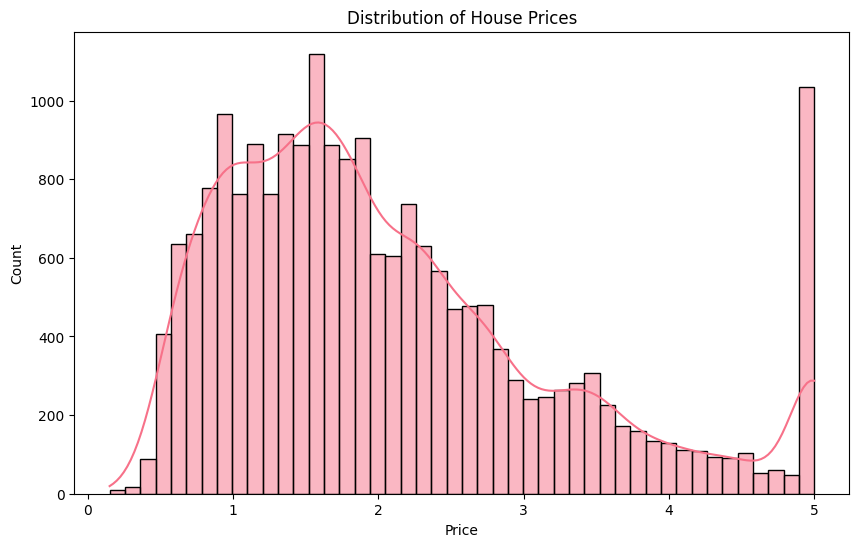

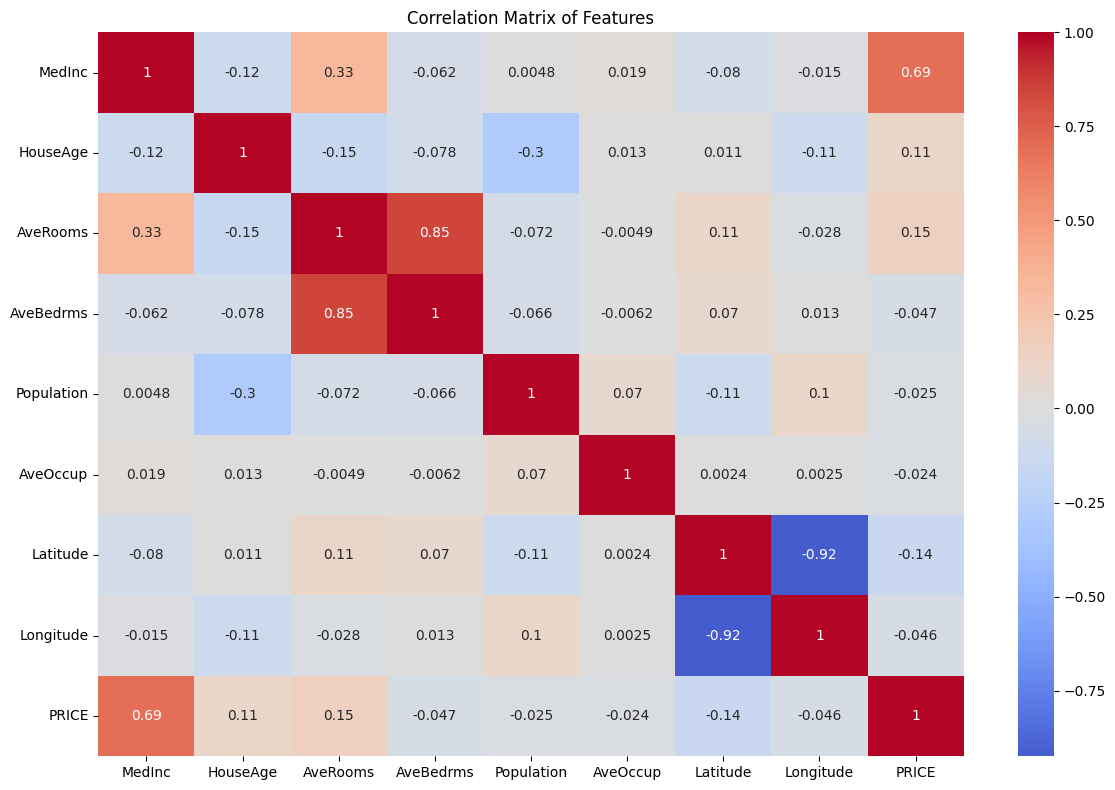

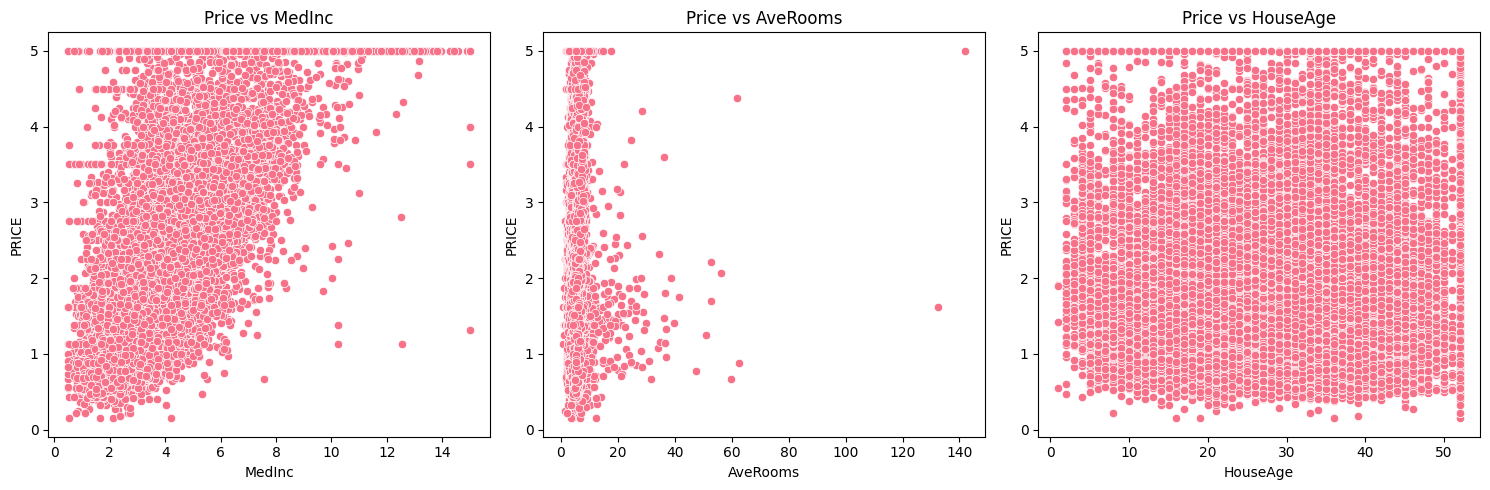

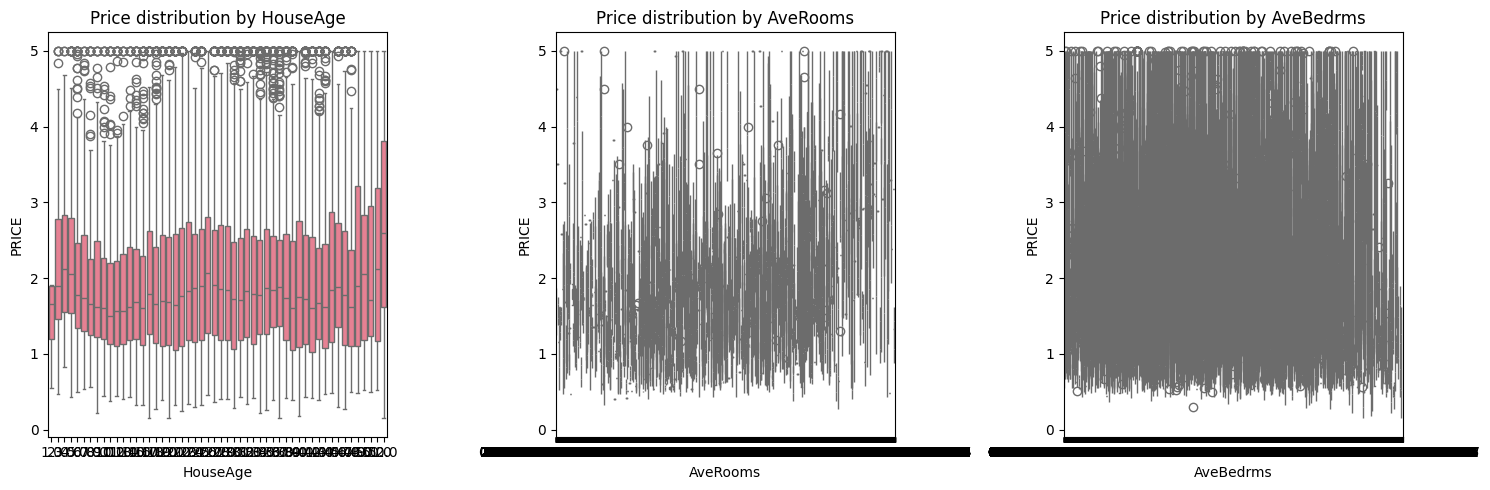


Step 3: Preparing data...
Training set shape: (16512, 8)
Testing set shape: (4128, 8)

Step 4: Training model...


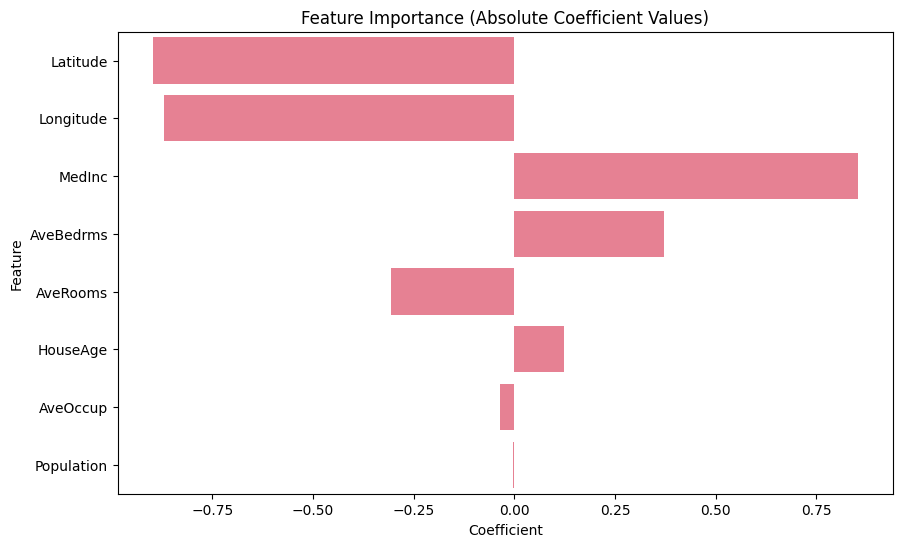


Step 5: Evaluating model...

Model Performance Metrics:
R-squared Score: 0.5758
Root Mean Square Error: 0.7456
Mean Square Error: 0.5559


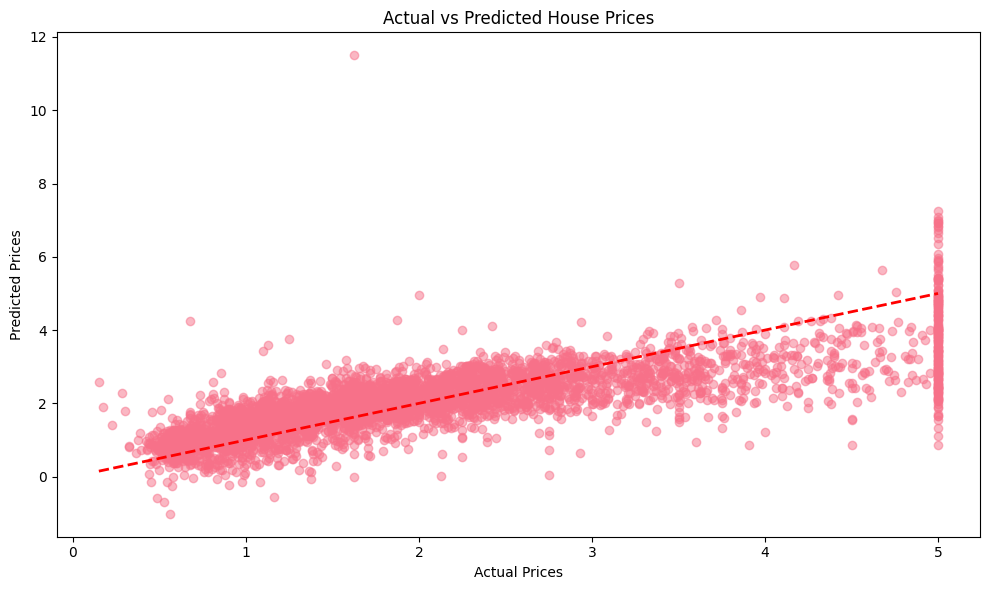

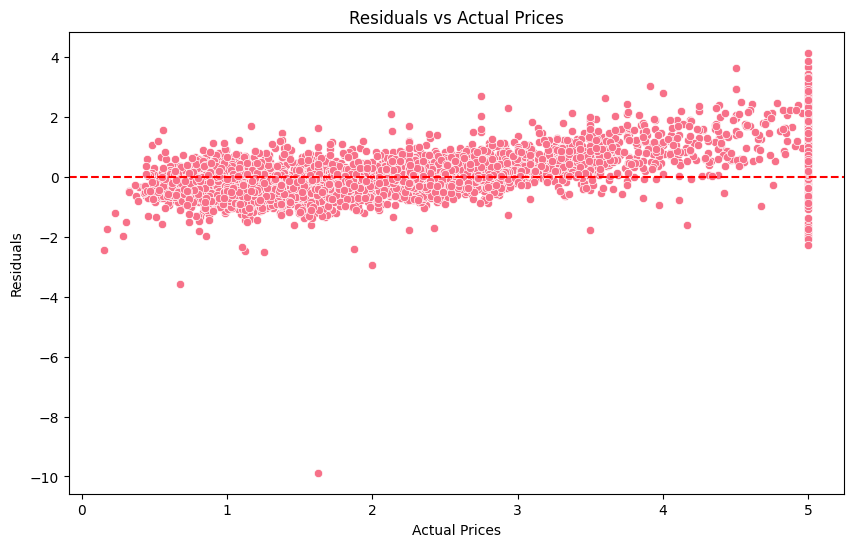

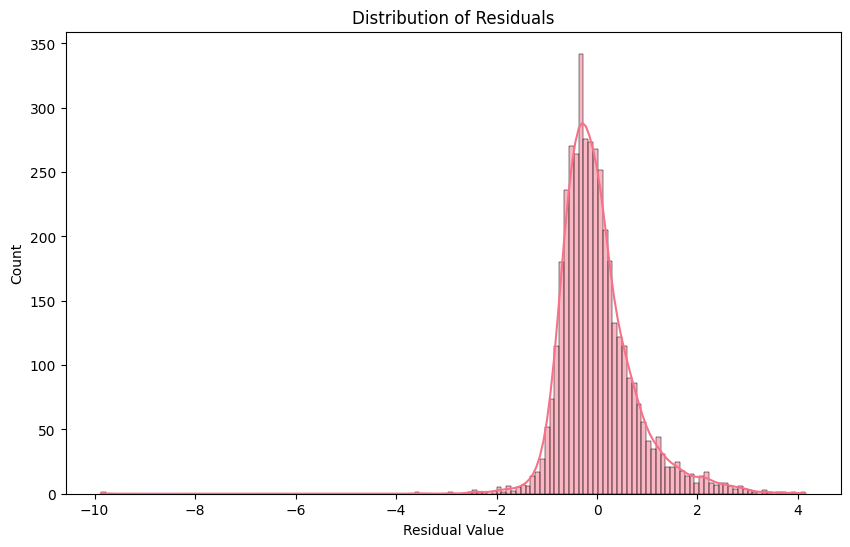


Step 6: Example prediction...

Predicted price for a sample house: $0.72


In [6]:
def main():
    # Create instance of analysis class
    analysis = BostonHousingAnalysis()

    # Step 1: Load and explore data
    print("Step 1: Loading data...")
    df = analysis.load_data()

    print("\nStep 2: Exploring data...")
    analysis.explore_data()

    # Step 3: Prepare data for modeling
    print("\nStep 3: Preparing data...")
    analysis.prepare_data()

    # Step 4: Train model
    print("\nStep 4: Training model...")
    analysis.train_model()

    # Step 5: Evaluate model
    print("\nStep 5: Evaluating model...")
    analysis.evaluate_model()

    # Example prediction
    print("\nStep 6: Example prediction...")
    # Create sample new data (one house) for California Housing
    # This sample data needs to match the features of the California Housing dataset
    # and should be scaled if the model was trained on scaled data.
    # For simplicity, let's create a sample row from the existing scaled data.
    if analysis.X_test is not None and analysis.X_test.shape[0] > 0:
        sample_house = analysis.X_test[0].reshape(1, -1)
        predicted_price = analysis.predict_new_data(sample_house)
        if predicted_price is not None:
            print(f"\nPredicted price for a sample house: ${predicted_price[0]:.2f}")
    else:
        print("\nCould not generate sample prediction as test data is not available.")


if __name__ == "__main__":
    main()